# Google Play Store Data 
### Complete EDA Analysis 

# About Dataset
## Descriptioin:
Available: https://www.kaggle.com/lava18/google-play-store-apps

**Context**
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1.0 Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2.0 Data Loading | Exploration | Cleaning
### load the dataset

In [2]:
df=pd.read_csv('../data-sets/googleplaystore.csv')

In [3]:
# displaying first five rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


. important think to do 

In [4]:
# set options to be maximum to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(f'the name of the columns in this dataset are as follows: {list(df.columns)}')

the name of the columns in this dataset are as follows: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Unnamed: 13']


In [6]:
print(f'the number of rows are {df.shape[0]}\n and number of columns are {df.shape[1]}')  

the number of rows are 10841
 and number of columns are 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Rating,Reviews,Unnamed: 13
count,9367.000000,1.084100e+04,0.0
mean,4.191513,4.441119e+05,NaN
std,0.515735,2.927629e+06,NaN
min,1.000000,0.000000e+00,NaN
25%,4.000000,3.800000e+01,NaN
50%,4.300000,2.094000e+03,NaN
75%,4.500000,5.476800e+04,NaN
max,5.000000,7.815831e+07,NaN


## how to make size a numeric column 

In [9]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M                   

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# Observations on Size column
1.varies with devies \
2.K\
3.M

In [11]:
df.isnull().sum()

App                   0
Category              1
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                1
Last Updated          0
Current Ver           8
Android Ver           2
Unnamed: 13       10841
dtype: int64

In [12]:
df['Size'].isnull().sum()

np.int64(0)

### no missing value in size we are good to go 

### verify the number of three different kind of values 

In [13]:
# finding the values having M in them 
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [14]:
# finding the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [15]:
# find the values having Varies with device in them 
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [16]:
len(df)

10841

In [17]:
1695+316+8830

10841

In [18]:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024*1024
        elif 'Varies with device' in size:
            return np.nan
        else:
            return size

In [19]:
# before applying values in the size column are 
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [20]:
# lets apply this function to the size column
df['Size'] = df['Size'].apply(convert_size)

In [21]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [22]:
df['Size'].value_counts().sum()

np.int64(9146)

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [24]:
df.rename(columns={'Size':'Size_in_Bytes'}, inplace=True)

In [25]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [27]:
df['Size_in_Mb']=df['Size_in_Bytes'].apply(lambda x: x/(1024*1024) )

In [28]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


In [31]:
# lets convert size into kb 
df['Size_in_kb']=df['Size_in_Mb'].apply(lambda x:x/1024)

In [32]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0,0.018555
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0,0.013672
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7,0.008496
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0,0.024414
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8,0.002734


In [35]:
#df['Size in MB']=df['Size_in_kb'].apply(lambda x: x*1024)

In [36]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb,Size_in_kb,Size in MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0,0.018555,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0,0.013672,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7,0.008496,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0,0.024414,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8,0.002734,2.8


In [37]:
df.drop('Size in MB', axis=1, inplace=True)


In [38]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0,0.018555
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0,0.013672
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7,0.008496
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0,0.024414
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8,0.002734


In [41]:
df.drop('Size_in_kb',axis=1,inplace =True)

In [42]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


## lets take care of install column

In [43]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [44]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [45]:
df['Installs'].isnull().sum()

np.int64(0)

## We have to remvoe these things from Installs columns 
1. Remove the (+) sign from values 
2. Remove the (,) from values
3. Convert the datatype from object to integer

In [46]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','')if '+' in str(x) else x )

In [47]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             908
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

In [48]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x )

In [49]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [50]:
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [51]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [52]:
df['Installs'].dtypes

dtype('int64')

In [53]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Unnamed: 13,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,0.0,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,NaN,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,NaN,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,NaN,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,NaN,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,NaN,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,NaN,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,NaN,100.000000


## Price Columns 

In [54]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

In [57]:
# lets see how many values have $ in them
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [61]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

In [65]:
df['Price']=df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)

In [67]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [68]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Unnamed: 13,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,0.0,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,NaN,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,NaN,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,NaN,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,NaN,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,NaN,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,NaN,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,NaN,100.000000


In [69]:
# Now we can convert this into numeric values 
df['Price']=df['Price'].apply(lambda x: float(x))


In [70]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Unnamed: 13,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,0.0,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,NaN,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,NaN,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,NaN,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,NaN,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,NaN,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,NaN,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,NaN,100.000000


In [79]:
# using f string print min,max, and average price of the app
print(f"Minimum price is {df['Price'].min()}")
print(f"Maximum price is {df['Price'].max()}")
print(f'Average price is {df["Price"].mean()}')

Minimum price is 0.0
Maximum price is 400.0
Average price is 1.0272733142699015


In [82]:
# misssing values inside the dataframe
df.isnull().sum().sort_values(ascending=False)

Unnamed: 13       10841
Size_in_Mb         1695
Size_in_Bytes      1695
Rating             1474
Current Ver           8
Android Ver           2
Category              1
Genres                1
Type                  1
App                   0
Reviews               0
Installs              0
Last Updated          0
Price                 0
Content Rating        0
dtype: int64

In [84]:
# find the missing values percentage in the data frame 
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage


App                 0.000000
Category            0.009224
Rating             13.596532
Reviews             0.000000
Size_in_Bytes      15.635089
Installs            0.000000
Type                0.009224
Price               0.000000
Content Rating      0.000000
Genres              0.009224
Last Updated        0.000000
Current Ver         0.073794
Android Ver         0.018448
Unnamed: 13       100.000000
Size_in_Mb         15.635089
dtype: float64

In [86]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Unnamed: 13       100.00
Size_in_Mb         15.64
Size_in_Bytes      15.64
Rating             13.60
Current Ver         0.07
Android Ver         0.02
Category            0.01
Genres              0.01
Type                0.01
App                 0.00
Reviews             0.00
Installs            0.00
Last Updated        0.00
Price               0.00
Content Rating      0.00
dtype: float64

In [88]:
# find total number of missing values 
df.isnull().sum().sum()

np.int64(15718)

<Axes: >

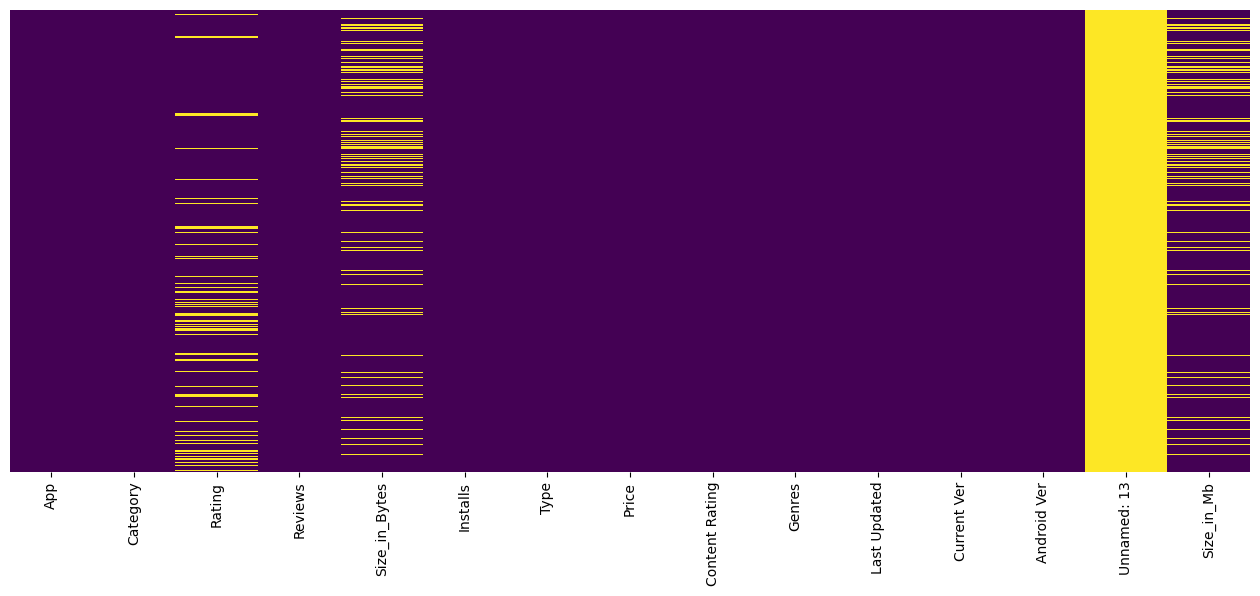

In [89]:
# plot missing values 
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

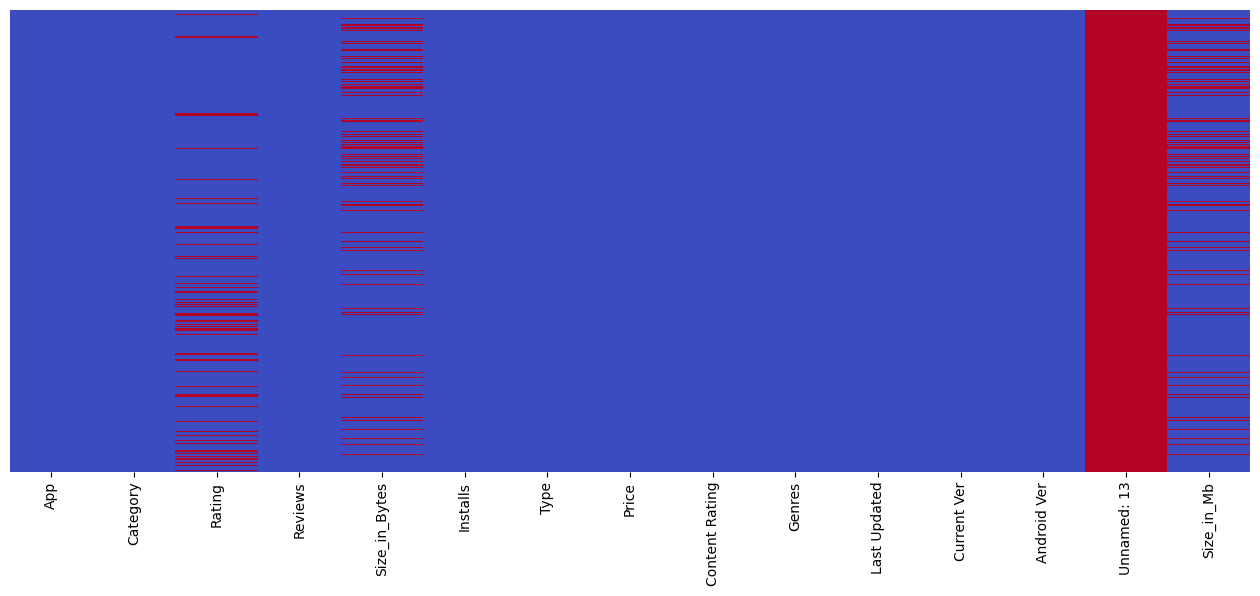

In [90]:
# plot missing values 
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [91]:
df.drop('Unnamed: 13', axis=1, inplace=True)


<Axes: >

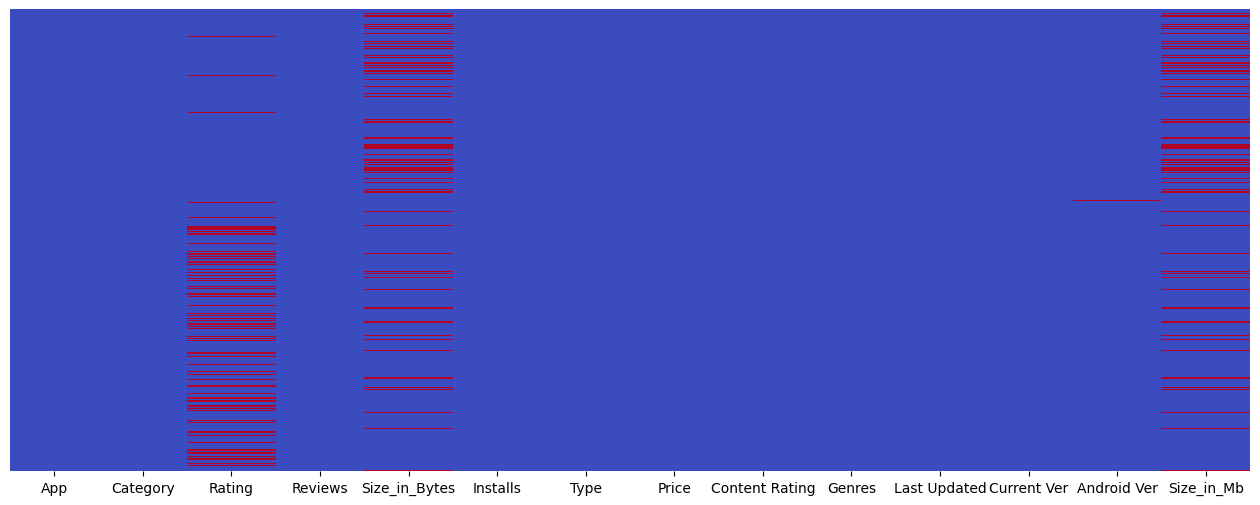

In [92]:
# plot missing values 
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [93]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb'],
      dtype='object')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

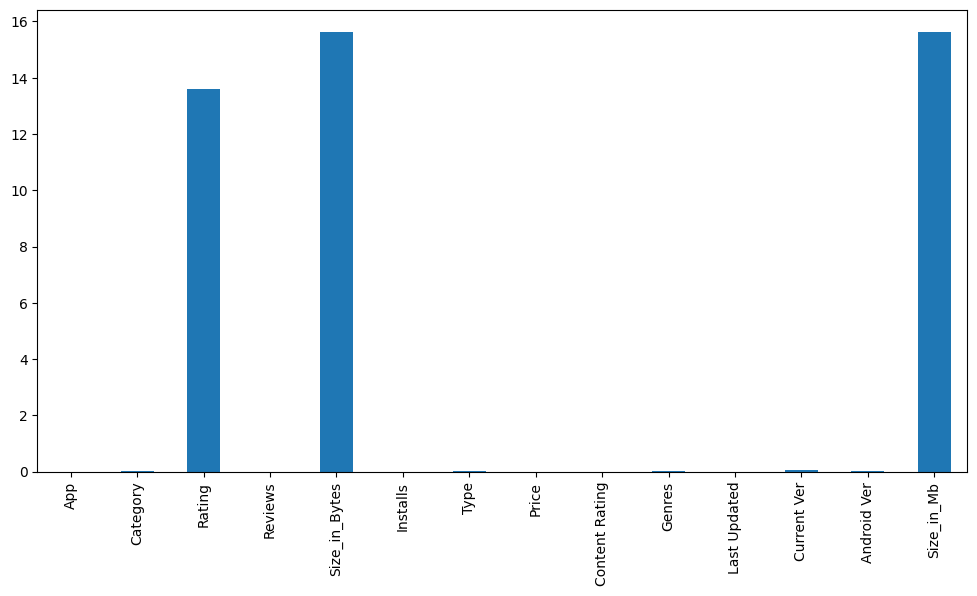

In [95]:
# make figure size
plt.figure(figsize=(12,6))
# plot the null values by their percentage in each column 
messing_percentage = (df.isnull().sum()/len(df))*100
messing_percentage.plot(kind='bar')
# add the labels
plt.xlabels('Columns')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')    

<Axes: >

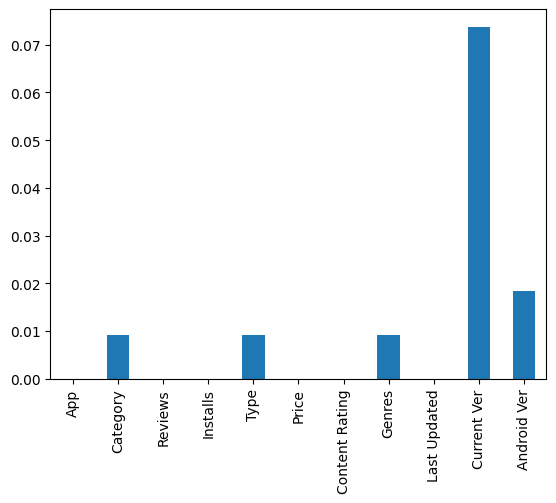

In [96]:
# ploting missing values less than 1 percent
messing_percentage[messing_percentage<1].plot(kind='bar')